In [1]:
# This notebook analyses the ouput of 
# running complexity.py

# grep 'for_parser:' complexity_PM.txt | sed 's/for_parser:,//g' | sed '1 i\cityname,i_o_length,prediction_horizon,grid_size,thresh,cx_sample_whole_data,cx_sample_single_point,CSR_PM_frac, CSR_PM_count'
# The above shell must be run and saved to PM.csvCSR_PM_frac

In [2]:
# ! grep 'for_parser:' t | sed 's/for_parser:,//g' > PM_scales_london_processed_exp.csv

In [3]:
# ! grep 'for_parser:' val_csv_all_models_all_cities/complexity_PM_results_all_models_all_cities.txt | sed 's/for_parser:,//g' > PM_results_all_cities_all_models.csv # cityname,i_o_length,prediction_horizon,grid_size,thresh,cx_sample_whole_data,cx_sample_single_point,CSR_PM_frac,CSR_PM_count,CSR_PM_no_thresh_median,CSR_PM_no_thresh_mean,CSR_PM_no_thresh_frac_median,CSR_PM_no_thresh_frac_mean,CSR_PM_no_thresh_median_exp,CSR_PM_no_thresh_mean_exp,CSR_PM_no_thresh_frac_median_exp,CSR_PM_no_thresh_frac_mean_exp,CSR_PM_no_thresh_mean_exp_minus_1,CSR_PM_no_thresh_median_exp_minus_1,

In [23]:
# ! grep 'for_parser:' val_csv_all_models_all_cities/complexity_PM_results_all_models.csv | sed 's/for_parser:,//g' > PM_results_all_cities_all_models.csv # cityname,i_o_length,prediction_horizon,grid_size,thresh,cx_sample_whole_data,cx_sample_single_point,CSR_PM_frac,CSR_PM_count,CSR_PM_no_thresh_median,CSR_PM_no_thresh_mean,CSR_PM_no_thresh_frac_median,CSR_PM_no_thresh_frac_mean,CSR_PM_no_thresh_median_exp,CSR_PM_no_thresh_mean_exp,CSR_PM_no_thresh_frac_median_exp,CSR_PM_no_thresh_frac_mean_exp,CSR_PM_no_thresh_mean_exp_minus_1,CSR_PM_no_thresh_median_exp_minus_1,

In [157]:
# ! grep 'for_parser:' val_csv_all_models_all_cities/complexity_PM_results_all_models_with_mse.txt | sed 's/for_parser:,//g' > PM_results_all_cities_all_models.csv # cityname,i_o_length,prediction_horizon,grid_size,thresh,cx_sample_whole_data,cx_sample_single_point,CSR_PM_frac,CSR_PM_count,CSR_PM_no_thresh_median,CSR_PM_no_thresh_mean,CSR_PM_no_thresh_frac_median,CSR_PM_no_thresh_frac_mean,CSR_PM_no_thresh_median_exp,CSR_PM_no_thresh_mean_exp,CSR_PM_no_thresh_frac_median_exp,CSR_PM_no_thresh_frac_mean_exp,CSR_PM_no_thresh_mean_exp_minus_1,CSR_PM_no_thresh_median_exp_minus_1,

In [11]:
# ! grep 'for_parser:' val_csv_all_models_all_cities/complexity_PM_results_all_cities_with_mse_pred_horiz.txt | sed 's/for_parser:,//g' > PM_results_all_cities_pred_horiz.csv # cityname,i_o_length,prediction_horizon,grid_size,thresh,cx_sample_whole_data,cx_sample_single_point,CSR_PM_frac,CSR_PM_count,CSR_PM_no_thresh_median,CSR_PM_no_thresh_mean,CSR_PM_no_thresh_frac_median,CSR_PM_no_thresh_frac_mean,CSR_PM_no_thresh_median_exp,CSR_PM_no_thresh_mean_exp,CSR_PM_no_thresh_frac_median_exp,CSR_PM_no_thresh_frac_mean_exp,CSR_PM_no_thresh_mean_exp_minus_1,CSR_PM_no_thresh_median_exp_minus_1,

In [5]:
import sys

sys.path.append("../")
import config

import numpy as np
import matplotlib.pyplot as plt
from smartprint import smartprint as sprint

In [6]:
import pandas as pd
df = pd.read_csv("PM_results_all_cities_all_models.csv")

city_color = {"london" : "red", 
             "melbourne": "blue",
             "madrid": "green"}
df.head()


,cityname,i_o_length,prediction_horizon,grid_size,thresh,cx_sample_whole_data,cx_sample_single_point,CSR_PM_frac,CSR_PM_count,CSR_PM_no_thresh_mean,CSR_PM_no_thresh_median,CSR_PM_no_thresh_frac_mean,CSR_PM_no_thresh_frac_median,CSR_PM_no_thresh_frac_mean_exp,CSR_PM_no_thresh_frac_mean_exp.1,CSR_PM_no_thresh_frac_exp_mean,CSR_PM_no_thresh_frac_exp_mean_signed,CSR_PM_count_y_exceeding_r_x,CSR_PM_y_dist_mse,CSR_PM_sum_y_exceeding_r_x_max
0,london,4,1,25,100,1500,200,NaN,NaN,785.303137,828.990414,0.177180,0.156365,1.193846,1.193846,1.211513,1.010140,6799,2.698056e+09,5733.524000
1,london,4,1,35,100,1500,200,NaN,NaN,840.704131,870.058468,0.150917,0.134680,1.162901,1.162901,1.175767,1.010420,6244,6.131750e+09,5208.181753
2,london,4,1,45,100,1500,200,NaN,NaN,978.336096,962.343883,0.122471,0.106924,1.130287,1.130287,1.138614,1.005584,6233,1.175603e+10,6122.340500
3,london,4,1,55,100,1500,200,NaN,NaN,1068.395993,1021.167339,0.120656,0.105833,1.128237,1.128237,1.136602,1.005628,6217,1.602824e+10,6878.405333
4,london,4,1,65,100,1500,200,NaN,NaN,1208.060872,1126.322581,0.126804,0.111037,1.135195,1.135195,1.143803,1.007640,5677,2.297051e+10,7568.270667


In [7]:
df.columns

Index(['cityname', 'i_o_length', 'prediction_horizon', 'grid_size', 'thresh',
       'cx_sample_whole_data', 'cx_sample_single_point', 'CSR_PM_frac',
       'CSR_PM_count', 'CSR_PM_no_thresh_mean', 'CSR_PM_no_thresh_median',
       'CSR_PM_no_thresh_frac_mean', 'CSR_PM_no_thresh_frac_median',
       'CSR_PM_no_thresh_frac_mean_exp', 'CSR_PM_no_thresh_frac_mean_exp.1',
       'CSR_PM_no_thresh_frac_exp_mean',
       'CSR_PM_no_thresh_frac_exp_mean_signed', 'CSR_PM_count_y_exceeding_r_x',
       'CSR_PM_y_dist_mse', 'CSR_PM_sum_y_exceeding_r_x_max'],
      dtype='object')

In [8]:
# df[(df["i_o_length"] == 4) & (df["cityname"] == "london") & (df["prediction_horizon"] == 1) & (df["grid_size"] == 25)]

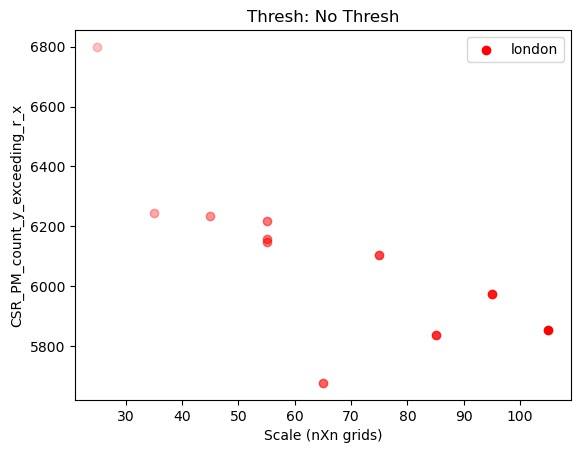

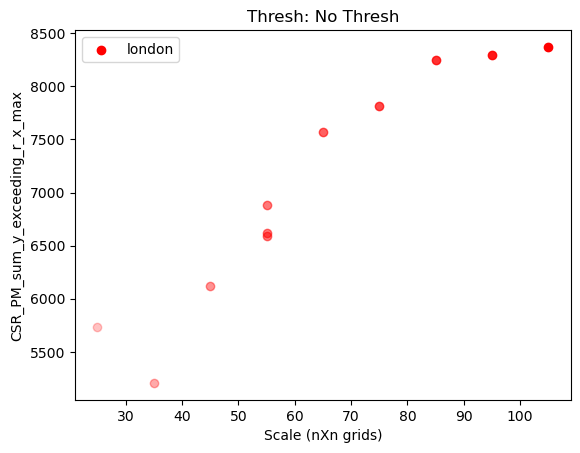

In [10]:
import pandas as pd
df = pd.read_csv("PM_results_all_cities_all_models.csv")

city_color = {"london" : "red", 
             "melbourne": "blue",
             "madrid": "green"}
df.head()



# scales

for CSR_type in [
# 'CSR_PM_no_thresh_mean', 'CSR_PM_no_thresh_median',
#        'CSR_PM_no_thresh_frac_mean', 'CSR_PM_no_thresh_frac_median',
#        'CSR_PM_no_thresh_frac_mean_exp', 'CSR_PM_no_thresh_frac_mean_exp.1',
#        'CSR_PM_no_thresh_frac_exp_mean',
#        'CSR_PM_no_thresh_frac_exp_mean_signed', 
    'CSR_PM_count_y_exceeding_r_x',
#        'CSR_PM_y_dist_mse', 
    'CSR_PM_sum_y_exceeding_r_x_max'
]:
    
    for city in config.city_list:

        cityname = city.lower()

        city_label_printed = []

        for scale in config.scales[::-1]:
            for i_o_length in config.i_o_lengths_def:
                for pred_horiz in config.pred_horiz_def:
                    filtered_rows = df[    \
                                       (df["i_o_length"]==i_o_length) & \
                                       (df["grid_size"]==scale) & \
                                       (df["prediction_horizon"]==pred_horiz) &\
                                       (df["cityname"]==cityname)
                                      ]
                    # print (filtered_rows)
                    if filtered_rows.shape[0] == 1:
                        range_ = [0]
                    else:
                        range_ = list(range(filtered_rows.shape[0]))
                        # sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                        # no worries, will be plotted multiple times # this is three times because of first combination overlap

                    # print (filtered_rows)

                    for i in range_:
                        if cityname in city_label_printed:
                            plt.scatter(scale, filtered_rows.iloc[i][CSR_type], color=city_color[cityname], alpha=scale/max(config.scales))
                        else:
                            plt.scatter(scale, filtered_rows.iloc[i][CSR_type], color=city_color[cityname], label=cityname, alpha=scale/max(config.scales))
                            city_label_printed.append(cityname)

    plt.title("Thresh: No Thresh")
    plt.xlabel("Scale (nXn grids)")
    plt.ylabel(CSR_type)
    # plt.yscale('log')
    plt.legend()
    plt.show()
    


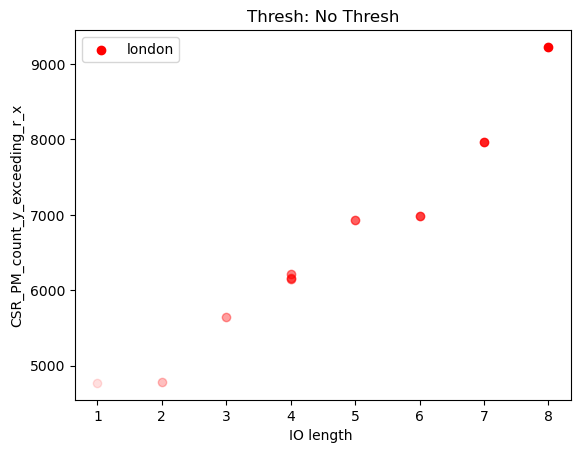

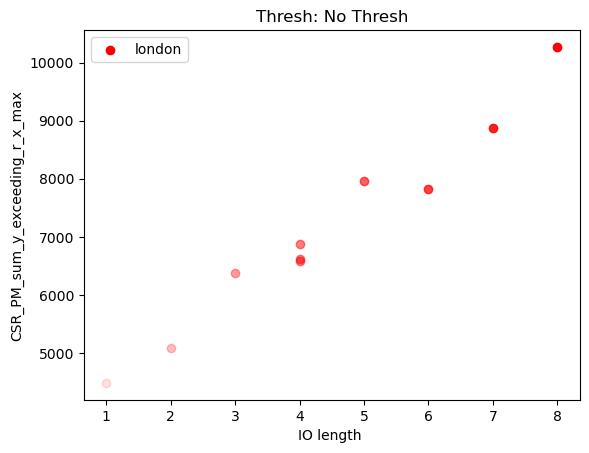

In [11]:
import pandas as pd
df = pd.read_csv("PM_results_all_cities_all_models.csv")

city_color = {"london" : "red", 
             "melbourne": "blue",
             "madrid": "green"}
df.head()



# scales

for CSR_type in [
# 'CSR_PM_no_thresh_mean', 'CSR_PM_no_thresh_median',
#        'CSR_PM_no_thresh_frac_mean', 'CSR_PM_no_thresh_frac_median',
#        'CSR_PM_no_thresh_frac_mean_exp', 'CSR_PM_no_thresh_frac_mean_exp.1',
#        'CSR_PM_no_thresh_frac_exp_mean',
#        'CSR_PM_no_thresh_frac_exp_mean_signed', 
    'CSR_PM_count_y_exceeding_r_x',
    #    'CSR_PM_y_dist_mse', 
    'CSR_PM_sum_y_exceeding_r_x_max'
]:
    for city in config.city_list:

        cityname = city.lower()

        city_label_printed = []

        for scale in config.scales_def:
            for i_o_length in config.i_o_lengths[::-1]:
                for pred_horiz in config.pred_horiz_def:
                    filtered_rows = df[    \
                                       (df["i_o_length"]==i_o_length) & \
                                       (df["grid_size"]==scale) & \
                                       (df["prediction_horizon"]==pred_horiz) &\
                                       (df["cityname"]==cityname)
                                      ]
                    # print (filtered_rows)
                    if filtered_rows.shape[0] == 1:
                        range_ = [0]
                    else:
                        range_ = list(range(filtered_rows.shape[0]))
                        # sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                        # no worries, will be plotted multiple times # this is three times because of first combination overlap

                    # print (filtered_rows)

                    for i in range_:
                        if cityname in city_label_printed:
                            plt.scatter(i_o_length, filtered_rows.iloc[i][CSR_type], color=city_color[cityname], alpha=i_o_length/max(config.i_o_lengths))
                        else:
                            plt.scatter(i_o_length, filtered_rows.iloc[i][CSR_type], color=city_color[cityname], label=cityname, alpha=i_o_length/max(config.i_o_lengths))
                            city_label_printed.append(cityname)

    plt.title("Thresh: No Thresh")
    plt.xlabel("IO length ")
    plt.ylabel(CSR_type)
    # plt.yscale('log')
    plt.legend()
    plt.show()
    


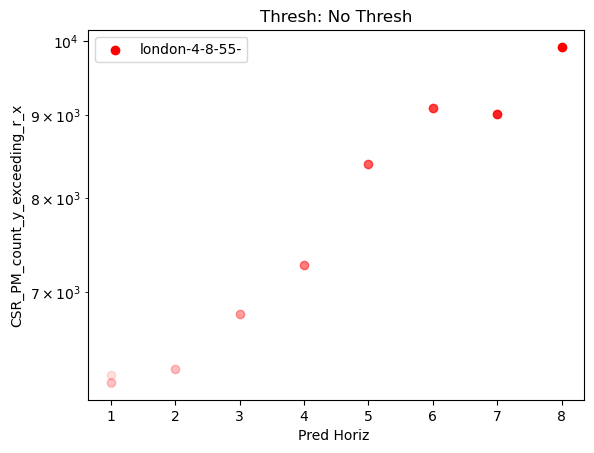

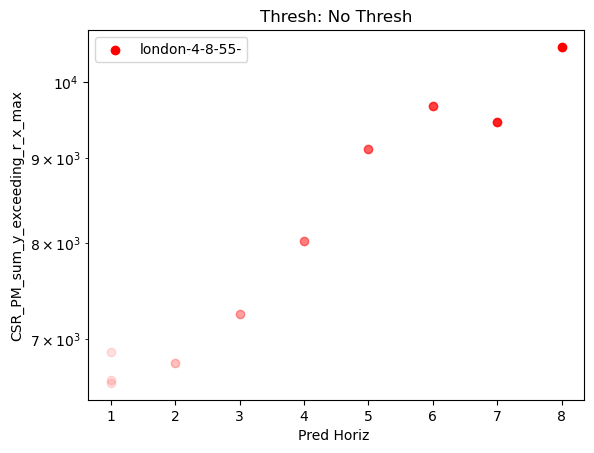

In [12]:
import pandas as pd
df = pd.read_csv("PM_results_all_cities_all_models.csv")

city_color = {"london" : "red", 
             "melbourne": "blue",
             "madrid": "green"}
df.head()

from preprocessing.ProcessRaw import ProcessRaw




# scales


for CSR_type in [
# 'CSR_PM_no_thresh_mean', 'CSR_PM_no_thresh_median',
#        'CSR_PM_no_thresh_frac_mean', 'CSR_PM_no_thresh_frac_median',
#        'CSR_PM_no_thresh_frac_mean_exp', 'CSR_PM_no_thresh_frac_mean_exp.1',
#        'CSR_PM_no_thresh_frac_exp_mean',
#        'CSR_PM_no_thresh_frac_exp_mean_signed', 'CSR_PM_count_y_exceeding_r_x',
    'CSR_PM_count_y_exceeding_r_x',
    'CSR_PM_sum_y_exceeding_r_x_max'
]:

    for city in ["london"]:#config.city_list:

        cityname = city.lower()

        city_label_printed = []

        for scale in config.scales_def:
            for i_o_length in config.i_o_lengths_def:
                for pred_horiz in config.pred_horiz[::-1]:
                    filtered_rows = df[    \
                                       (df["i_o_length"]==i_o_length) & \
                                       (df["grid_size"]==scale) & \
                                       (df["prediction_horizon"]==pred_horiz) &\
                                       (df["cityname"]==cityname)
                                      ]
                    prefix = ProcessRaw.file_prefix(cityname=cityname,
                                                    io_length=i_o_length, 
                                                    pred_horiz=pred_horiz, 
                                                    scale=scale)                    
                    # print (filtered_rows)
                    if filtered_rows.shape[0] == 1:
                        range_ = [0]
                    else:
                        range_ = list(range(filtered_rows.shape[0]))
                        # sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                        # no worries, will be plotted multiple times # this is three times because of first combination overlap

                    # print (filtered_rows)

                    for i in range_:
                        if cityname in city_label_printed:
                            plt.scatter(pred_horiz, filtered_rows.iloc[i][CSR_type], color=city_color[cityname], alpha=pred_horiz/max(config.pred_horiz))
                        else:
                            plt.scatter(pred_horiz, filtered_rows.iloc[i][CSR_type], color=city_color[cityname], label=prefix, alpha=pred_horiz/max(config.pred_horiz))
                            city_label_printed.append(cityname)

    plt.title("Thresh: No Thresh")
    plt.xlabel("Pred Horiz ")
    plt.ylabel(CSR_type)
    plt.yscale('log')
    plt.legend()
    plt.show()



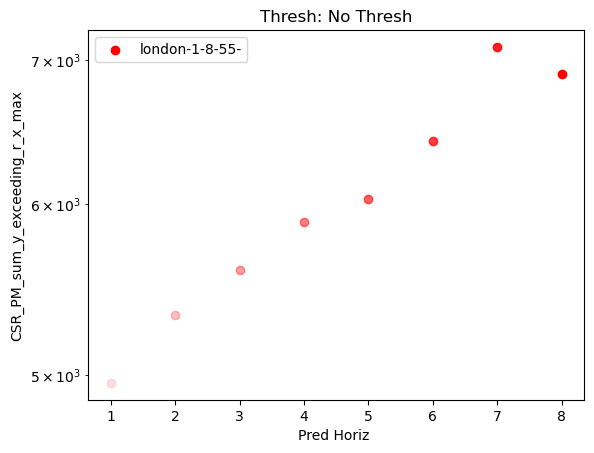

In [9]:
import pandas as pd
df = pd.read_csv("PM_results_all_cities_pred_horiz.csv")

city_color = {"london" : "red", 
             "melbourne": "blue",
             "madrid": "green"}
df.head()

from preprocessing.ProcessRaw import ProcessRaw




# scales

for CSR_type in [
# 'CSR_PM_no_thresh_mean', 'CSR_PM_no_thresh_median',
#        'CSR_PM_no_thresh_frac_mean', 'CSR_PM_no_thresh_frac_median',
#        'CSR_PM_no_thresh_frac_mean_exp', 'CSR_PM_no_thresh_frac_mean_exp.1',
#        'CSR_PM_no_thresh_frac_exp_mean',
#        'CSR_PM_no_thresh_frac_exp_mean_signed', 'CSR_PM_count_y_exceeding_r_x',
#        'CSR_PM_y_dist_mse', 
    'CSR_PM_sum_y_exceeding_r_x_max'
]:

    for city in config.city_list:

        cityname = city.lower()

        city_label_printed = []

        for scale in config.scales_def:
            for i_o_length in [1]:
                for pred_horiz in config.pred_horiz[::-1]:
                    filtered_rows = df[    \
                                       (df["i_o_length"]==i_o_length) & \
                                       (df["grid_size"]==scale) & \
                                       (df["prediction_horizon"]==pred_horiz) &\
                                       (df["cityname"]==cityname)
                                      ]
                    prefix = ProcessRaw.file_prefix(cityname=cityname,
                                                    io_length=i_o_length, 
                                                    pred_horiz=pred_horiz, 
                                                    scale=scale)                    
                    # print (filtered_rows)
                    if filtered_rows.shape[0] == 1:
                        range_ = [0]
                    else:
                        range_ = list(range(filtered_rows.shape[0]))
                        # sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                        # no worries, will be plotted multiple times # this is three times because of first combination overlap

                    # print (filtered_rows)

                    for i in range_:
                        if cityname in city_label_printed:
                            plt.scatter(pred_horiz, filtered_rows.iloc[i][CSR_type], color=city_color[cityname], alpha=pred_horiz/max(config.pred_horiz))
                        else:
                            plt.scatter(pred_horiz, filtered_rows.iloc[i][CSR_type], color=city_color[cityname], label=prefix, alpha=pred_horiz/max(config.pred_horiz))
                            city_label_printed.append(cityname)

    plt.title("Thresh: No Thresh")
    plt.xlabel("Pred Horiz ")
    plt.ylabel(CSR_type)
    plt.yscale('log')
    plt.legend()
    plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


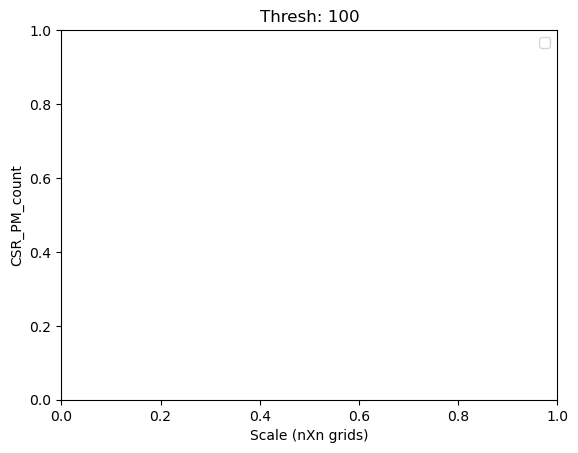

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


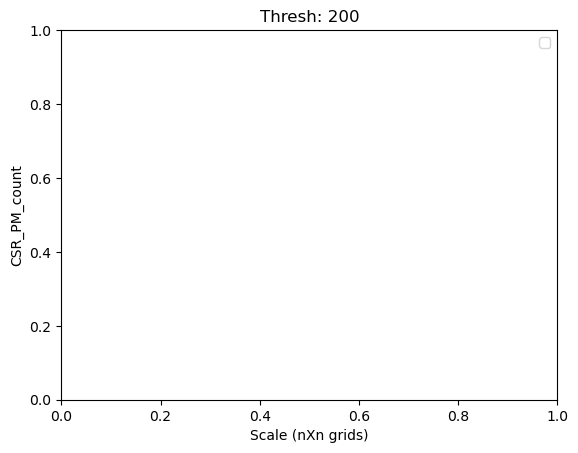

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


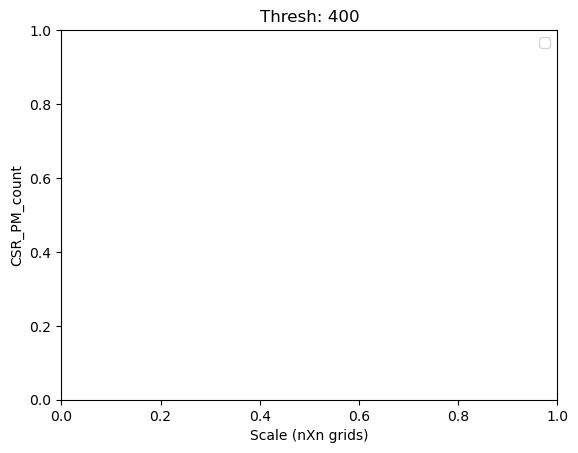

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


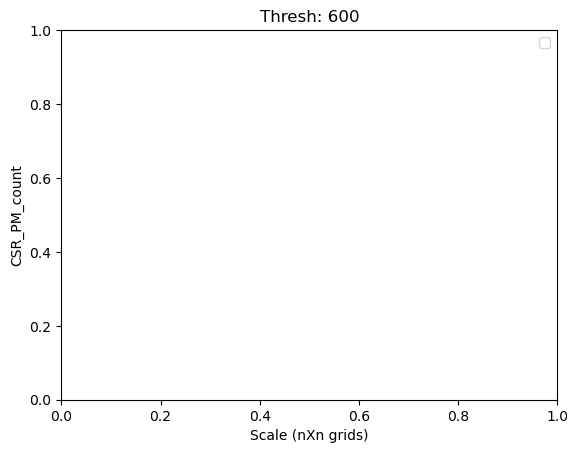

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


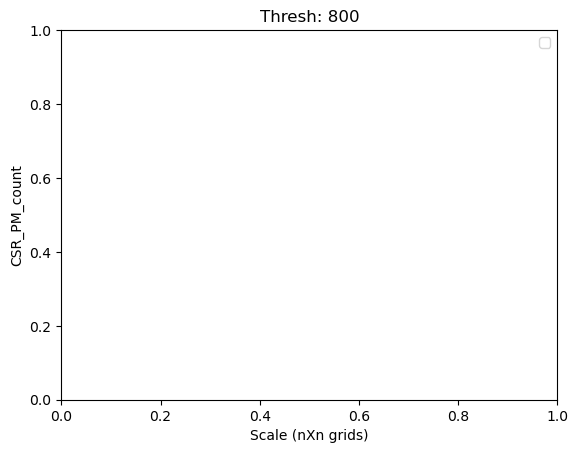

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


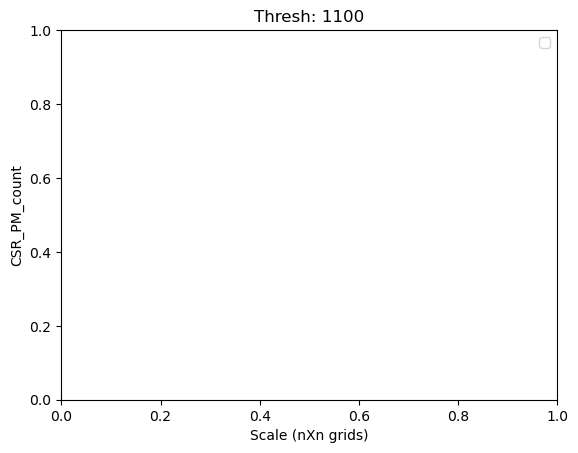

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


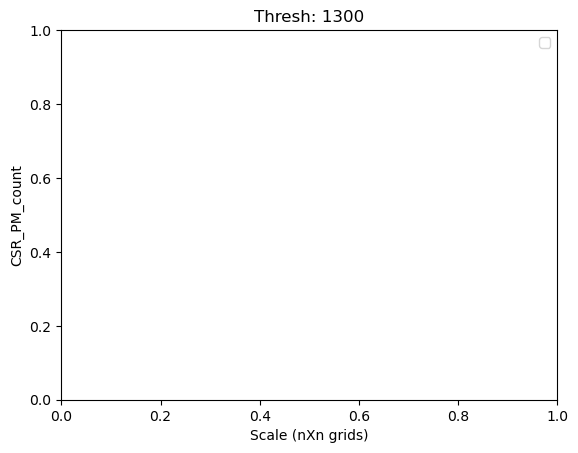

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


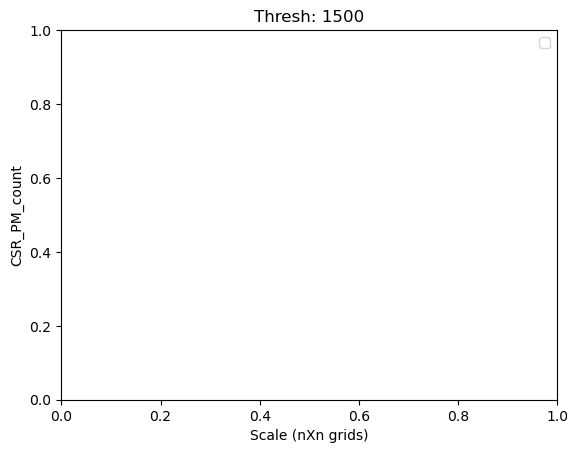

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


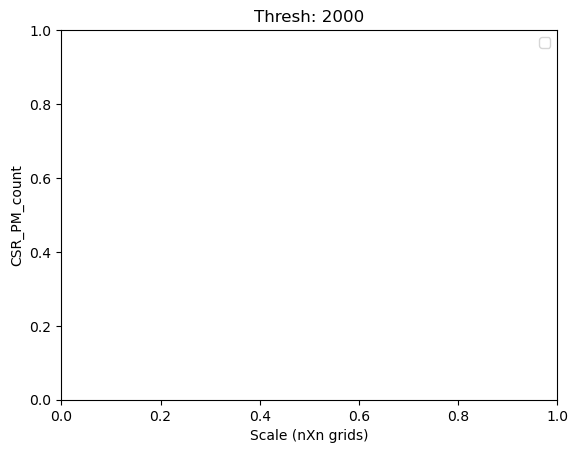

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


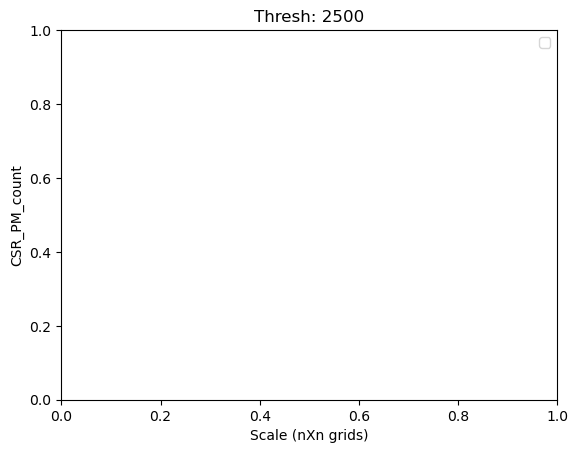

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


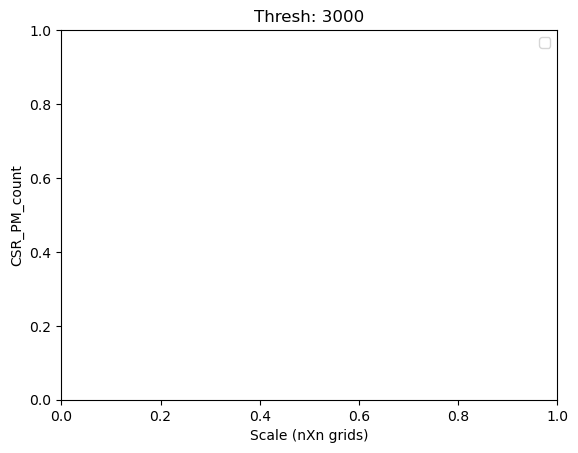

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


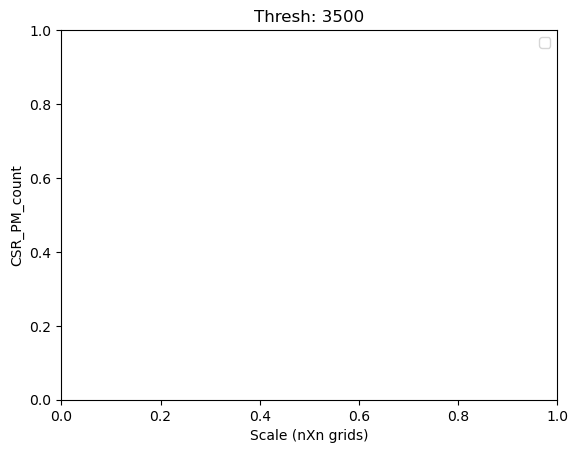

In [8]:

for thresh in [100, 200, 400, 600, 800, 1100, 1300, 1500, 2000, 2500, 3000, 3500]:

    for city in ["london"]: # config.city_list:

        cityname = city.lower()

        city_label_printed = []

        for scale in [25, 35, 45, 55, 65, 75, 85, 105]:
            for i_o_length in [1]:
                for pred_horiz in [4]:
                    filtered_rows = df[    \
                                       (df["i_o_length"]==i_o_length) & \
                                       (df["grid_size"]==scale) & \
                                       (df["prediction_horizon"]==pred_horiz) &\
                                       (df["cityname"]==cityname) &\
                                       (df["thresh"]==thresh)
                                      ]
                    # print (filtered_rows)
                    if filtered_rows.shape[0] == 1:
                        range_ = [0]
                    else:
                        range_ = list(range(filtered_rows.shape[0]))
                        # sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                        # no worries, will be plotted multiple times # this is three times because of first combination overlap


                    for i in range_:
                        if cityname in city_label_printed:
                            plt.scatter(scale, filtered_rows.iloc[i].CSR_PM_count, color=city_color[cityname])
                        else:
                            plt.scatter(scale, filtered_rows.iloc[i].CSR_PM_count, color=city_color[cityname], label=cityname)
                            city_label_printed.append(cityname)

    plt.title("Thresh: " + str(thresh))
    plt.xlabel("Scale (nXn grids)")
    plt.ylabel("CSR_PM_count")
    plt.legend()
    plt.show()
    
    

In [21]:
cc = np.array([
    [0.120,0.34,-1234.1]
])

print (1/(1+np.exp(-cc)))

[[0.52996405 0.58419052 0.        ]]


/var/folders/dp/q2rz500s2kj79pnbkf36h7ch0000gq/T/ipykernel_3218/3695986450.py:5: RuntimeWarning: overflow encountered in exp
  print (1/(1+np.exp(-cc)))


In [34]:
np.logaddexp([90, 90, 89], [100, 100, 102])

array([100.0000454 , 100.0000454 , 102.00000226])

In [35]:
np.log(np.exp(89) + np.exp(102))

102.00000226032685

In [41]:
np.log(np.clip(np.exp([-100000, 1,2,45, 10000]), 0.0000001, 10000000))

/var/folders/dp/q2rz500s2kj79pnbkf36h7ch0000gq/T/ipykernel_3218/870301171.py:1: RuntimeWarning: overflow encountered in exp
  np.log(np.clip(np.exp([-100000, 1,2,45, 10000]), 0.0000001, 10000000))


array([-16.11809565,   1.        ,   2.        ,  16.11809565,
        16.11809565])

In [67]:
from itertools import pairwise

l = [-10, 1, 2, 45, 10]
s = 0
if len(l)%2 != 0:
     l = l + [-np.inf]
        
s = 0
for i in range(0, len(l), 2):
    s += np.logaddexp(l[i], l[i+1])
    print (l[i], l[i+1])
    print (np.logaddexp(l[i], l[i+1]))
    
    # print (s)
print (s)

-10 1
1.0000167015613184
2 45
45.0
10 -inf
10.0
56.00001670156132


In [62]:
print (np.exp(l))
print (np.sum(np.exp(l)))
np.log(np.sum(np.exp(l)))

[4.53999298e-05 2.71828183e+00 7.38905610e+00 3.49342711e+19
 2.20264658e+04]
3.4934271057485115e+19


45.0

In [95]:
l

[-10, 1, 2, 45, 10]

In [110]:
def logsum(l):
    if len(l) == 1:
        return l[0]
    return logsum([np.logaddexp(l[0], l[1])] + l[2:])


# odd length
l = [-10, 1, 2, 45, 100]

assert (logsum(l) == np.log(np.sum(np.exp(l))))
sprint (logsum(l))

# even length
l = [-10, 1, 2, 43]

assert (logsum(l) == np.log(np.sum(np.exp(l))))
sprint (logsum(l))

logsum(l) : 100.0
logsum(l) : 43.0


In [112]:
logsum([1,2,3,4,50000])

50000.0

In [129]:
from scipy.special import logsumexp as scipy_logsum


In [144]:
import time
l = np.random.rand(100) * 100

starttime = time.time()
scipy_logsum(l)
print (time.time() - starttime)

0.00017380714416503906


In [145]:
starttime = time.time()
logsum(l)
print (time.time() - starttime)

IndexError: index 0 is out of bounds for axis 0 with size 0